<a href="https://colab.research.google.com/github/oktaw-g/AI/blob/main/P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt 3
 **California Housing**

 Podział jak w przykładzie z zajęć

In [ ]:
import pandas as pd
import numpy as np

DATASET_PATH = "CaliforniaHousing.csv"

In [ ]:
# Wczytanie datasetu California Housing
dataset = pd.read_csv(DATASET_PATH)

In [ ]:
# Informacje o zestawie danych
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
DATASET_FEATURE_DSCRB = {
    "longitude": "A measure of how far west a house is; a higher value is farther west",
    "latitude": "A measure of how far north a house is; a higher value is farther north",
    "housing_median_age": "Median age of a house within a block; a lower number is a newer building",
    "total_rooms": "Total number of rooms within a block",
    "total_bedrooms": "Total number of bedrooms within a block",
    "population": "Total number of people residing within a block",
    "households": "Total number of households, a group of people residing within a home unit, for a block",
    "median_income": "Median income for households within a block of houses (measured in tens of thousands of US Dollars)",
    "median_house_value": "Median house value for households within a block (measured in US Dollars)",
    "ocean_proximity": " Location of the house w.r.t ocean/sea",

}
DATASET_FEATURE_LABELS = {
    "longitude": "lon",
    "latitude": "lat",
    "housing_median_age": "age",
    "total_rooms": "rooms",
    "total_bedrooms": "bedrooms",
    "population": "pop",
    "households": "households",
    "median_income": "income",
    "median_house_value": "val",
    "ocean_proximity": "ocean",
}

In [ ]:
# Zmiana nazwy kolumn
dataset = dataset.rename(columns=DATASET_FEATURE_LABELS)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lon         20640 non-null  float64
 1   lat         20640 non-null  float64
 2   age         20640 non-null  float64
 3   rooms       20640 non-null  float64
 4   bedrooms    20433 non-null  float64
 5   pop         20640 non-null  float64
 6   households  20640 non-null  float64
 7   income      20640 non-null  float64
 8   val         20640 non-null  float64
 9   ocean       20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Brakujące dane

In [ ]:
# Znalezienie brakujących danych
dataset.isnull().any()

,0
lon,False
lat,False
age,False
rooms,False
bedrooms,True
pop,False
households,False
income,False
val,False
ocean,False


In [ ]:
# W rzędzie jest brakująca wartość
isnull = dataset.isnull().any(axis=1)
print(np.count_nonzero(isnull),"brakujących wartości.")
# Usunięcie rzędu
dataset = dataset.drop(np.asarray(isnull).nonzero()[0].tolist() ,axis=0)

207 brakujących wartości.


In [ ]:
# Podgląd pierwszych 10 rzędów
dataset.head(10)

,lon,lat,age,rooms,bedrooms,pop,households,income,val,ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:

dataset_cat=dataset.select_dtypes(include='object')
dataset_cat.columns

dataset.replace(to_replace=["NEAR OCEAN","<1H OCEAN","NEAR BAY",'ISLAND',"INLAND"], value = [0,1,2,3,4], inplace=True)

dataset['ocean'] = dataset['ocean'].astype('int')

<ipython-input-121-99f480eb946b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(to_replace=["NEAR OCEAN","<1H OCEAN","NEAR BAY",'ISLAND',"INLAND"], value = [0,1,2,3,4], inplace=True)


# Wydzielenie zmiennej zależnej

In [ ]:
# Wydzielenie zmiennej zależnej (Y)
x,y = dataset.drop(columns=["val"]), dataset["val"]

# EDA

In [ ]:
# Podstawowa analiza statystyczna
x.describe()

,lon,lat,age,rooms,bedrooms,pop,households,income,ocean
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,1.936720
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,1.491512
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000


array([[<Axes: title={'center': 'lon'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'pop'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'ocean'}>]], dtype=object)

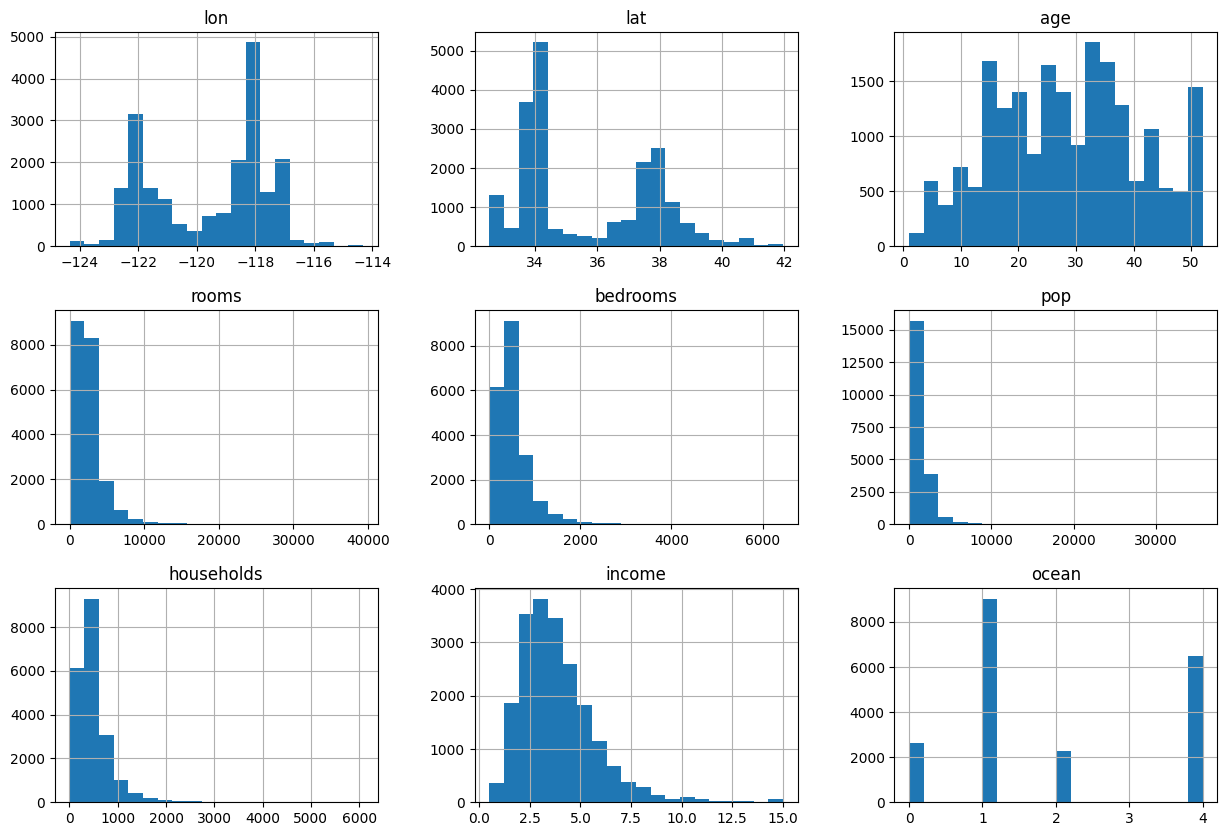

In [ ]:
# Hisotgramy zmiennych niezależnych
x.hist(figsize=(15,10), bins=20)

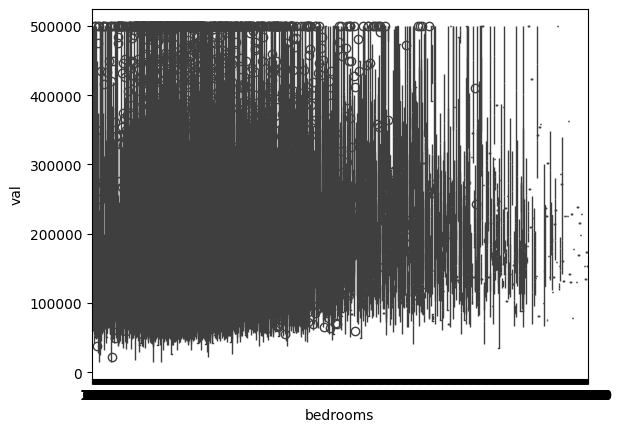

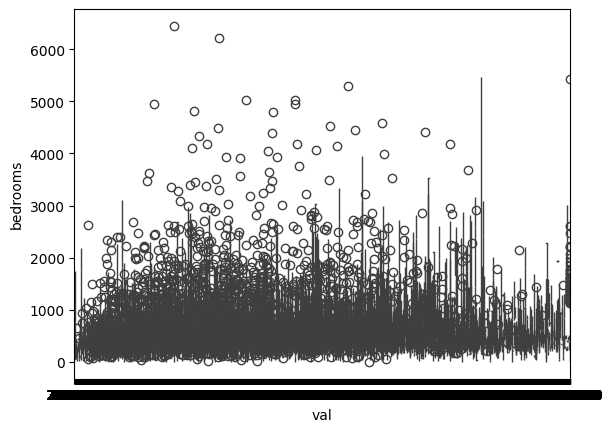

In [ ]:
# Wykresy BOXPLOT

import seaborn as sns
import matplotlib.pyplot as plt

# Zmienna zależna Y(median value) w zależności od ilości pokojów
plt.clf()
sns.boxplot(y=y, x=x["bedrooms"].round())
plt.show()

plt.clf()
sns.boxplot(y=x["bedrooms"], x=y.round(-1))
plt.show()

<Axes: >

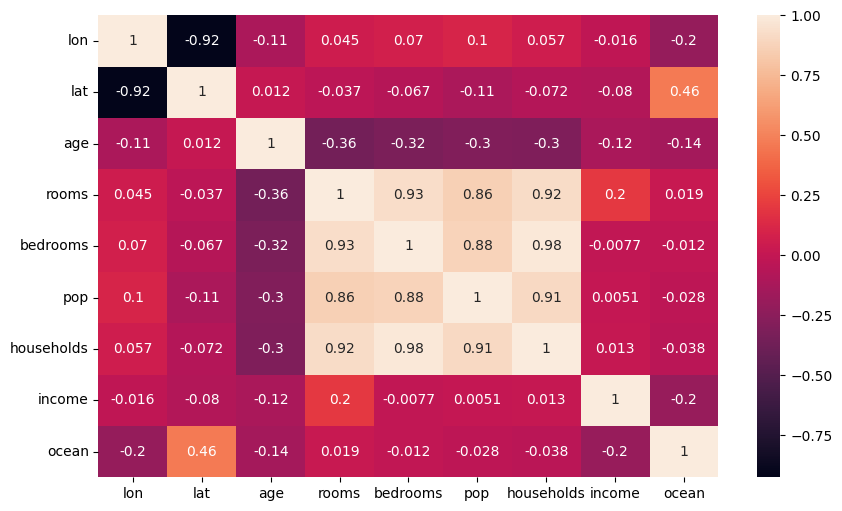

In [ ]:
# Analiza korelacji pomiędzy zmiennymi

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(x.select_dtypes(exclude='object').corr(), ax=ax, annot=True)

# Podział na zbiory Train, Test i Val

In [ ]:
# Podział na subsety TRAIN, TEST oraz VAL

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=5, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=5, shuffle=True)

In [ ]:
x_train.describe()

,lon,lat,age,rooms,bedrooms,pop,households,income,ocean
count,12259.000000,12259.000000,12259.000000,12259.000000,12259.000000,12259.000000,12259.000000,12259.000000,12259.000000
mean,-119.564216,35.629360,28.620279,2626.639693,536.782690,1421.843707,498.867444,3.863997,1.620768
std,2.000072,2.132724,12.604549,2131.137578,413.403681,1083.567032,375.803071,1.902141,1.065866
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000
25%,-121.780000,33.930000,18.000000,1453.000000,297.500000,791.000000,282.000000,2.563800,1.000000
50%,-118.490000,34.260000,29.000000,2134.000000,435.000000,1164.000000,410.000000,3.520800,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1727.000000,606.000000,4.725000,3.000000
max,-114.310000,41.920000,52.000000,32054.000000,5290.000000,15507.000000,5050.000000,15.000100,3.000000


In [ ]:
x_val.describe()

,lon,lat,age,rooms,bedrooms,pop,households,income,ocean
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-119.611510,35.666748,28.692684,2663.950575,541.612430,1428.477367,500.785417,3.911565,1.601174
std,2.013273,2.152717,12.718824,2169.803608,421.548021,1143.533862,379.492552,1.916189,1.049895
min,-124.350000,32.560000,2.000000,16.000000,4.000000,8.000000,3.000000,0.499900,0.000000
25%,-121.850000,33.940000,18.000000,1465.000000,299.000000,778.500000,282.000000,2.553600,1.000000
50%,-118.540000,34.270000,29.000000,2144.000000,439.000000,1172.000000,411.000000,3.578900,1.000000
75%,-118.020000,37.740000,37.000000,3170.500000,632.000000,1738.500000,597.000000,4.843600,3.000000
max,-114.570000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,3.000000


In [ ]:
x_test.describe()

,lon,lat,age,rooms,bedrooms,pop,households,income,ocean
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-119.549281,35.611277,28.611940,2638.646685,537.391730,1430.724737,499.779300,3.852247,1.630536
std,2.004298,2.130909,12.427731,2354.785128,444.393374,1261.482855,403.898102,1.873486,1.066340
min,-124.220000,32.550000,1.000000,12.000000,4.000000,9.000000,3.000000,0.499900,0.000000
25%,-121.770000,33.930000,18.000000,1433.000000,291.000000,783.000000,274.000000,2.573800,1.000000
50%,-118.480000,34.240000,29.000000,2086.000000,429.000000,1168.000000,404.000000,3.550000,1.000000
75%,-117.990000,37.690000,37.000000,3129.500000,646.000000,1694.500000,607.000000,4.710500,3.000000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,3.000000


# Skalowanie wartości niezależnych

In [ ]:
# Skalowanie zmiennych niezależnych numerycznych z użyciem StandardScaler
# Enkodowanie zmiennych niezależnych kategorycznych z użyciem OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer


col_categorical = x_train.select_dtypes(include='object').columns
col_numerical = x_train.select_dtypes(exclude='object').columns

col_transformer = make_column_transformer(
    (StandardScaler(), col_numerical),
    (OrdinalEncoder(), col_categorical)
)

# Regresja

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

RMSE: 79548.22
R^2: 0.523


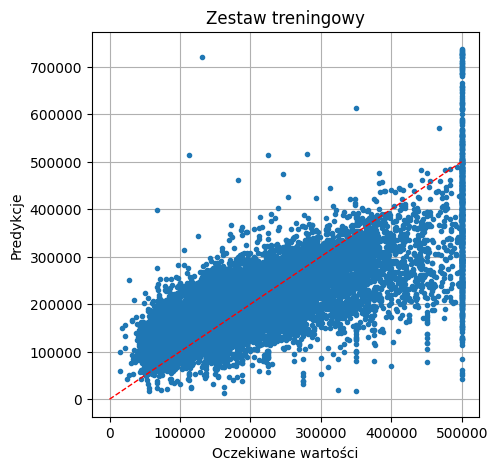

In [ ]:
# Regresja liniowa

from sklearn.linear_model import LinearRegression

linear_regressor = Pipeline([
    ('col_transformer', col_transformer),
    ('linear_regressor', LinearRegression(positive=True))
])
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_train)
print(f"RMSE: {mean_squared_error(y_train, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_train, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_train, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw treningowy")
ax.grid(True)
plt.show()


RMSE: 0.00
R^2: 1.000


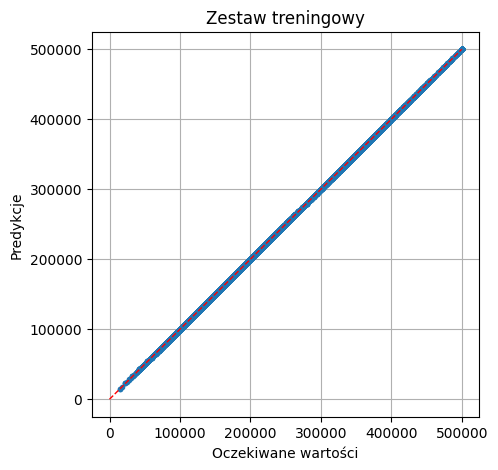

In [ ]:
# Drzewo decyzyjne

from sklearn.tree import DecisionTreeRegressor

decision_tree = Pipeline([
    ('col_transformer', col_transformer),
    ('decision_tree', DecisionTreeRegressor())
])
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_train)
print(f"RMSE: {mean_squared_error(y_train, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_train, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_train, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw treningowy")
ax.grid(True)
plt.show()

# Ewaluacja

RMSE: 80856.44
R^2: 0.521


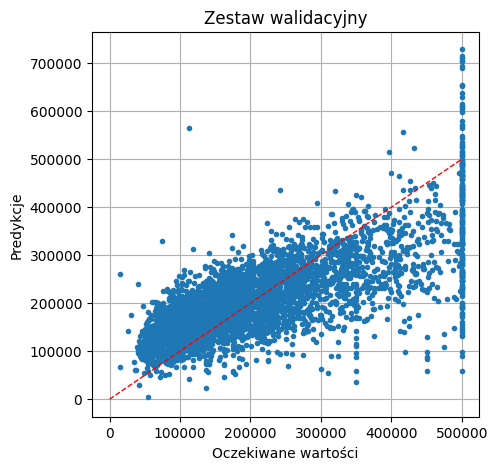

In [ ]:
# Ewaluacja regresji liniowej na zestawie walidacyjnym

y_pred = linear_regressor.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

RMSE: 71950.57
R^2: 0.621


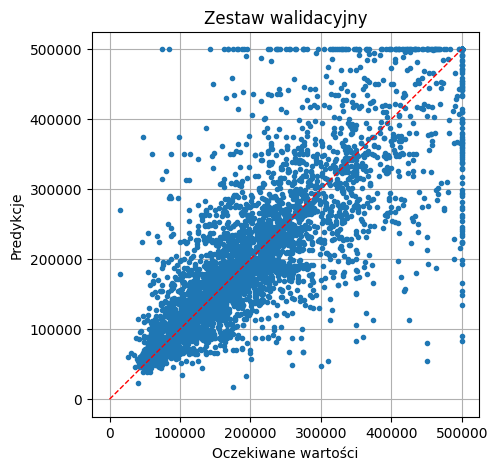

In [ ]:
# Ewaluacja drzewa decyzyjnego na zestawie walidacyjnym

y_pred = decision_tree.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

# Strojenie hiperparametrów

In [ ]:
# Listowanie parametrów drzewa decyzyjnego
decision_tree['decision_tree'].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Dobór wielkości drzewa decyzyjnego
rmse = []
depths = [1, 2, 5, 10, 15, 20, 25, 50]
for depth in depths:

    decision_tree.set_params(**{'decision_tree__max_depth': depth})
    decision_tree.fit(x_val, y_val)
    y_pred = decision_tree.predict(x_val)
    rmse.append(mean_squared_error(y_val, y_pred)**.5)

best_depth, best_rmse = depths[np.argmin(rmse)], np.min(rmse)


print(f"Best RMSE: {best_rmse:.2f} dla max_depth={best_depth}")

Best RMSE: 0.00 dla max_depth=50


In [ ]:
# Zastosowanie hiperparametrów i ponowny trening
decision_tree.set_params(**{'decision_tree__max_depth': best_depth})

decision_tree.fit(x_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['lon', 'lat', 'age', 'rooms', 'bedrooms', 'pop', 'households', 'income',
       'ocean'],
      dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index([], dtype='object'))])),
                ('decision_tree', DecisionTreeRegressor(max_depth=50))])

RMSE: 71590.91
R^2: 0.625


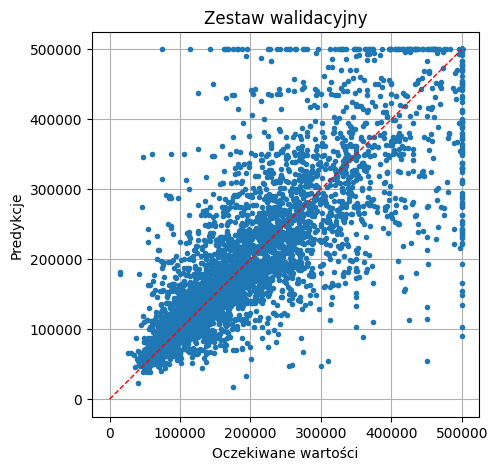

In [ ]:
# Ewaluacja na zestawie walidacyjnym
y_pred = decision_tree.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

# LASSO

In [ ]:
# Regresja Lasso do oceny ważności zmiennych niezależnych

from sklearn.linear_model import Lasso

lasso = Pipeline([
    ('col_transformer', col_transformer),
    ('lasso', Lasso(alpha=1e-05, max_iter=4000))
])

lasso.fit(x_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['lon', 'lat', 'age', 'rooms', 'bedrooms', 'pop', 'households', 'income',
       'ocean'],
      dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index([], dtype='object'))])),
                ('lasso', Lasso(alpha=1e-05, max_iter=4000))])

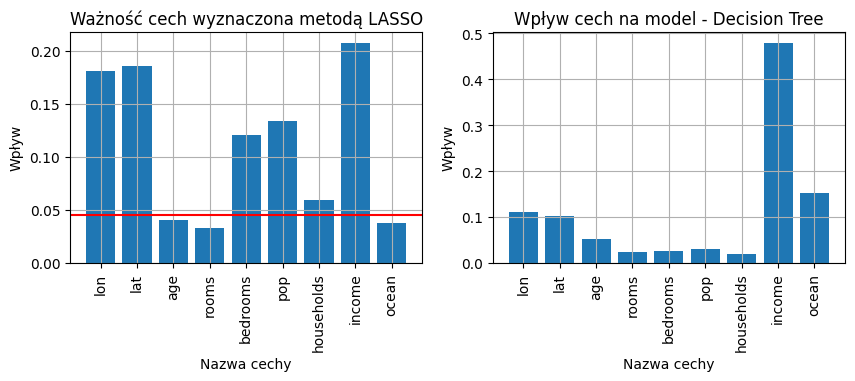

Index(['lon', 'lat', 'bedrooms', 'pop', 'households', 'income'], dtype='object')


In [ ]:
# Wyznaczenie ważności zmiennych niezależnych i ich wizualizacja

lasso_coef = np.abs(lasso['lasso'].coef_)
lasso_coef /= np.sum(lasso_coef)

THRESH = 0.045

decision_tree_coef = np.abs(decision_tree['decision_tree'].feature_importances_)
decision_tree_coef /= np.sum(decision_tree_coef)

# plotting the Column Names and Importance of Columns.
fig,axes = plt.subplots(1,2,figsize=(10,3))

axes[0].bar(x_train.columns.values, lasso_coef)
axes[0].axhline(y=THRESH, color='r', linestyle='-')
axes[0].grid()
axes[0].set_xticks(x_train.columns.values)
axes[0].set_xticklabels(x_train.columns.values, rotation = 90)
axes[0].set_title("Ważność cech wyznaczona metodą LASSO")
axes[0].set_xlabel("Nazwa cechy")
axes[0].set_ylabel("Wpływ")

axes[1].bar(x_train.columns.values, decision_tree_coef)
axes[1].grid()
axes[1].set_xticks(x_train.columns.values)
axes[1].set_xticklabels(x_train.columns.values, rotation = 90)
axes[1].set_title("Wpływ cech na model - Decision Tree")
axes[1].set_xlabel("Nazwa cechy")
axes[1].set_ylabel("Wpływ")

plt.show()

features_selected = x_train.columns[lasso_coef > THRESH]
features_ignored = x_train.columns[lasso_coef <= THRESH]
print(features_selected)

In [ ]:
# Usunięcie zmiennych nieistotnych
x_train = x_train.drop(columns=features_ignored)
x_val = x_val.drop(columns=features_ignored)
x_test = x_test.drop(columns=features_ignored)

In [ ]:
# Ponowne stworzenie pipeline'u oraz trenowanie modelu drzewa decyzyjnego dla zestawu z nowymi zmiennymi

col_categorical = x_train.select_dtypes(include='object').columns
col_numerical = x_train.select_dtypes(exclude='object').columns

col_transformer = make_column_transformer(
    (StandardScaler(), col_numerical),
    (OrdinalEncoder(), col_categorical)
)

decision_tree = Pipeline([
    ('col_transformer', col_transformer),
    ('decision_tree', DecisionTreeRegressor(max_depth=best_depth))
])


decision_tree.fit(x_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['lon', 'lat', 'bedrooms', 'pop', 'households', 'income'], dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index([], dtype='object'))])),
                ('decision_tree', DecisionTreeRegressor(max_depth=50))])

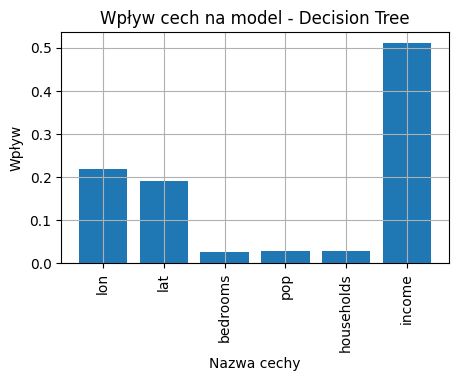

In [ ]:
# Wyznaczenie wpłwu cech niezależnych na model

decision_tree_coef = np.abs(decision_tree['decision_tree'].feature_importances_)
decision_tree_coef /= np.sum(decision_tree_coef)

# plotting the Column Names and Importance of Columns.
fig,ax = plt.subplots(1,1,figsize=(5,3))

ax.bar(x_train.columns.values, decision_tree_coef)
ax.grid()
ax.set_xticks(x_train.columns.values)
ax.set_xticklabels(x_train.columns.values, rotation = 90)
ax.set_title("Wpływ cech na model - Decision Tree")
ax.set_xlabel("Nazwa cechy")
ax.set_ylabel("Wpływ")

plt.show()

RMSE: 67660.79
R^2: 0.665


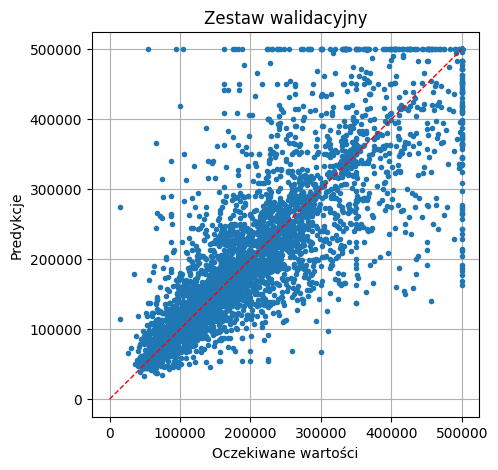

In [ ]:
# Ewaluacja na zestawie walidacyjnym
y_pred = decision_tree.predict(x_val)
print(f"RMSE: {mean_squared_error(y_val, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_val, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_val, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw walidacyjny")
ax.grid(True)
plt.show()

# Walidacja finalna

RMSE: 69189.60
R^2: 0.636


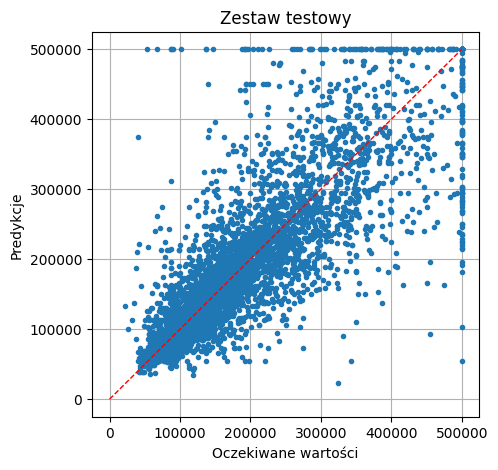

In [ ]:
y_pred = decision_tree.predict(x_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred)**.5:.2f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(y_test, y_pred, '.')
ax.plot([0, np.max(y_val)], [0, np.max(y_val)], color='red', linestyle='--', linewidth=1)
ax.set_xlabel("Oczekiwane wartości")
ax.set_ylabel("Predykcje")
ax.set_title("Zestaw testowy")
ax.grid(True)
plt.show()